Experimento baseado no paper:  
# Benchmarking deep network architectures for ethnicity recognition using a new large face dataset  
A. Greco, G. Percannella, M. Vento, and V. Vigilante - Machine Vision and Applications, pp.-, 2020. Online available: https://rdcu.be/b7cX6 

In [3]:
import tensorflow as tf
print("TensorFlow version: ", tf.__version__)
gpu = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(gpu))
tf.config.experimental.set_memory_growth(gpu[0], True)
import pandas as pd
import xml.etree.ElementTree as ET
from PIL import Image
import os
import numpy as np
from keras import layers
from keras_vggface.vggface import VGGFace
from keras.models import Model
from matplotlib import pyplot as plt
import mtcnn
print(mtcnn.__version__)
import cv2
import sys
from IPython.display import clear_output
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import shutil

AttributeError: module 'tensorflow' has no attribute '__version__'

In [2]:
import tensorflow as tf

# 10.000 Imagens
Africanos:          1250 Mulheres e 1250 Homens  
Caucasianos:        1250 Mulheres e 1250 Homens  
Asiaticos Indianos: 1250 Mulheres e 1250 Homens  
Leste Asiaticos:    1250 Mulheres e 1250 Homens

In [ ]:
Train = ET.parse("F:/VGG-Face2/VMER_dataset/finalTrain.xml")
Test = ET.parse("F:/VGG-Face2/VMER_dataset/finalTest.xml")
trainRoot = Train.getroot()
testRoot = Test.getroot()
trainIDX = {}
for subjct in trainRoot.iter('subject'):
    id_element = subjct.find('id')
    ethEl = subjct.find('ethnicity')
    if id_element is not None and ethEl is not None:
        subject_id = id_element.text
        ethnicity = ethEl.text
        trainIDX[subject_id] = ethnicity
print(trainIDX)
#Onde trainIDX[i][0] eh o numero do individuo e trainIDX[i][1] eh sua etnia
testIDX = {}
for subjct in testRoot.iter('subject'):
    id_element = subjct.find('id')
    ethEl = subjct.find('ethnicity')
    if id_element is not None and ethEl is not None:
        subject_id = id_element.text
        ethnicity = ethEl.text
        testIDX[subject_id] = ethnicity
print(testIDX)
#Onde testIDX[i][0] eh o numero do individuo e testIDX[i][1] eh sua etnia


{'n000002': '3', 'n000003': '3', 'n000004': '3', 'n000005': '3', 'n000006': '4', 'n000007': '4', 'n000008': '3', 'n000010': '4', 'n000011': '4', 'n000012': '3', 'n000013': '3', 'n000014': '1', 'n000015': '1', 'n000016': '3', 'n000017': '3', 'n000018': '3', 'n000019': '3', 'n000020': '3', 'n000021': '3', 'n000022': '3', 'n000023': '3', 'n000024': '3', 'n000025': '3', 'n000026': '3', 'n000027': '4', 'n000028': '4', 'n000030': '3', 'n000031': '3', 'n000032': '4', 'n000033': '4', 'n000034': '1', 'n000035': '3', 'n000036': '2', 'n000037': '3', 'n000038': '3', 'n000039': '2', 'n000041': '3', 'n000042': '3', 'n000043': '4', 'n000044': '3', 'n000045': '3', 'n000046': '3', 'n000047': '3', 'n000048': '3', 'n000049': '3', 'n000050': '3', 'n000051': '3', 'n000052': '3', 'n000053': '3', 'n000054': '3', 'n000055': '3', 'n000056': '2', 'n000057': '3', 'n000058': '3', 'n000059': '3', 'n000060': '3', 'n000061': '3', 'n000062': '3', 'n000063': '3', 'n000064': '3', 'n000065': '3', 'n000066': '3', 'n00006

In [ ]:
path = "F:/VGG-Face2/meta/identity_meta.csv"
df = pd.read_csv(path)
df.head()

,Class_ID,Name,Sample_Num,Flag,Gender
0,n000001,"""14th_Dalai_Lama""",424,0,m
1,n000002,"""A_Fine_Frenzy""",315,1,f
2,n000003,"""A._A._Gill""",205,1,m
3,n000004,"""A._J._Buckley""",387,1,m
4,n000005,"""A._J._Pierzynski""",229,1,m


In [ ]:
male_class_ids = df.loc[df[' Gender'] == ' m', 'Class_ID'].tolist()
female_class_ids = df.loc[df[' Gender'] == ' f', 'Class_ID'].tolist()
print(len(male_class_ids),male_class_ids)
print(len(female_class_ids),female_class_ids)


['n000001', 'n000003', 'n000004', 'n000005', 'n000006', 'n000007', 'n000008', 'n000012', 'n000013', 'n000014', 'n000015', 'n000016', 'n000017', 'n000018', 'n000019', 'n000020', 'n000021', 'n000023', 'n000026', 'n000027', 'n000028', 'n000029', 'n000030', 'n000031', 'n000032', 'n000033', 'n000034', 'n000035', 'n000036', 'n000037', 'n000038', 'n000040', 'n000041', 'n000042', 'n000044', 'n000045', 'n000046', 'n000047', 'n000048', 'n000049', 'n000050', 'n000051', 'n000052', 'n000053', 'n000054', 'n000055', 'n000056', 'n000057', 'n000058', 'n000059', 'n000060', 'n000061', 'n000062', 'n000063', 'n000064', 'n000065', 'n000066', 'n000070', 'n000074', 'n000075', 'n000077', 'n000078', 'n000079', 'n000080', 'n000081', 'n000082', 'n000083', 'n000084', 'n000085', 'n000086', 'n000087', 'n000088', 'n000089', 'n000094', 'n000095', 'n000096', 'n000101', 'n000102', 'n000103', 'n000116', 'n000117', 'n000120', 'n000121', 'n000122', 'n000123', 'n000125', 'n000126', 'n000127', 'n000128', 'n000129', 'n000130'

In [ ]:
trainIDX["n000002"]

'3'

In [ ]:
afroMales = []
asianMales = []
caucasianMales = []
indianMales = []
afroFemales = []
asianFemales = []
caucasianFemales = []
indianFemales = []
for index, row in df[df[" Gender"] == ' m'].iterrows(): #male
    #print(row["Class_ID"])
    if row["Class_ID"] in trainIDX:
        if(int(trainIDX[row["Class_ID"]]) == 1): #afro
                afroMales.append(row["Class_ID"])
        if(int(trainIDX[row["Class_ID"]]) == 2): #asian
                asianMales.append(row["Class_ID"])
        if(int(trainIDX[row["Class_ID"]]) == 3): #caucasian
                caucasianMales.append(row["Class_ID"])
        if(int(trainIDX[row["Class_ID"]]) == 4): #indian
                indianMales.append(row["Class_ID"])
print(afroMales)
print(asianMales)
print(caucasianMales)
print(indianMales)
for index1, row1 in df[df[" Gender"] == ' f'].iterrows(): #female
    #print(row1["Class_ID"])
    if row1["Class_ID"] in trainIDX:
        if(int(trainIDX[row1["Class_ID"]]) == 1): #afro
                afroFemales.append(row1["Class_ID"])
        if(int(trainIDX[row1["Class_ID"]]) == 2): #asian
                asianFemales.append(row1["Class_ID"])
        if(int(trainIDX[row1["Class_ID"]]) == 3): #caucasian
                caucasianFemales.append(row1["Class_ID"])
        if(int(trainIDX[row1["Class_ID"]]) == 4): #indian
                indianFemales.append(row1["Class_ID"])

print(afroFemales)
print(asianFemales)
print(caucasianFemales)
print(indianFemales)

['n000014', 'n000015', 'n000034', 'n000094', 'n000096', 'n000171', 'n000172', 'n000173', 'n000191', 'n000208', 'n000209', 'n000220', 'n000233', 'n000253', 'n000265', 'n000267', 'n000294', 'n000345', 'n000353', 'n000366', 'n000370', 'n000391', 'n000400', 'n000470', 'n000475', 'n000476', 'n000477', 'n000478', 'n000518', 'n000538', 'n000539', 'n000586', 'n000690', 'n000691', 'n000701', 'n000703', 'n000725', 'n000744', 'n000760', 'n000761', 'n000772', 'n000781', 'n000783', 'n000795', 'n000801', 'n000805', 'n000814', 'n000821', 'n000830', 'n000831', 'n000832', 'n000868', 'n000871', 'n000878', 'n000904', 'n000906', 'n000931', 'n000944', 'n000971', 'n000978', 'n000987', 'n000989', 'n001036', 'n001070', 'n001076', 'n001081', 'n001082', 'n001109', 'n001122', 'n001144', 'n001167', 'n001170', 'n001171', 'n001173', 'n001179', 'n001207', 'n001267', 'n001273', 'n001279', 'n001280', 'n001283', 'n001288', 'n001373', 'n001386', 'n001392', 'n001478', 'n001479', 'n001503', 'n001520', 'n001526', 'n001529'

In [ ]:
trainPath = "F:/VGG-Face2/data/vggface2_train/train"
x_train = []
y_train = []
amount = 1250
def trainBuild(X_train,Y_train,quant,pool,categorical):
    counter = 0
    etnCount = 0
    print("Size of x_train = ",len(x_train))
    while etnCount < quant:
        for folder in pool:
            if etnCount == quant:
                break
            trainPath = "F:/VGG-Face2/data/vggface2_train/train/"+str(folder)
            pessoa = os.listdir(trainPath)
            lista = [file for file in pessoa]
            image = Image.open(trainPath+'/'+str(lista[counter]))
            image = image.resize((224,224))
            img_array = np.array(image)
            X_train.append(img_array)
            Y_train.append(categorical)
            etnCount += 1
        counter += 1
    return
trainBuild(x_train,y_train,amount, afroMales,        [1])
trainBuild(x_train,y_train,amount, afroFemales,      [0])
trainBuild(x_train,y_train,amount, asianMales,       [1])
trainBuild(x_train,y_train,amount, asianFemales,     [0])
trainBuild(x_train,y_train,amount, caucasianMales,   [1])
trainBuild(x_train,y_train,amount, caucasianFemales, [0])
trainBuild(x_train,y_train,amount, indianMales,      [1])
trainBuild(x_train,y_train,amount, indianFemales,    [0])
print("Size of x_train = ",len(x_train))
#print(x_train)


Size of x_train =  0
Size of x_train =  1250
Size of x_train =  2500
Size of x_train =  3750
Size of x_train =  5000
Size of x_train =  6250
Size of x_train =  7500
Size of x_train =  8750
Size of x_train =  10000


In [ ]:
afroMales = []
asianMales = []
caucasianMales = []
indianMales = []
afroFemales = []
asianFemales = []
caucasianFemales = []
indianFemales = []
for index, row in df[df[" Gender"] == ' m'].iterrows():
    #print(row["Class_ID"])
    if row["Class_ID"] in testIDX:
        if(int(testIDX[row["Class_ID"]]) == 1): #afro
                afroMales.append(row["Class_ID"])
        if(int(testIDX[row["Class_ID"]]) == 2): #asian
                asianMales.append(row["Class_ID"])
        if(int(testIDX[row["Class_ID"]]) == 3): #caucasian
                caucasianMales.append(row["Class_ID"])
        if(int(testIDX[row["Class_ID"]]) == 4): #indian
                indianMales.append(row["Class_ID"])
# print(afroMales)
# print(asianMales)
# print(caucasianMales)
# print(indianMales)
for index1, row1 in df[df[" Gender"] == ' f'].iterrows():
    #print(row1["Class_ID"])
    if row1["Class_ID"] in testIDX:
        if(int(testIDX[row1["Class_ID"]]) == 1): #afro
                afroFemales.append(row1["Class_ID"])
        if(int(testIDX[row1["Class_ID"]]) == 2): #asian
                asianFemales.append(row1["Class_ID"])
        if(int(testIDX[row1["Class_ID"]]) == 3): #caucasian
                caucasianFemales.append(row1["Class_ID"])
        if(int(testIDX[row1["Class_ID"]]) == 4): #indian
                indianFemales.append(row1["Class_ID"])

# print(afroFemales)
# print(asianFemales)
# print(caucasianFemales)
# print(indianFemales)

In [ ]:
print(afroMales)

['n000178', 'n000596', 'n000928', 'n000950', 'n002267', 'n002329', 'n002351', 'n002761', 'n002773', 'n003894', 'n004486', 'n004663', 'n004719', 'n005112', 'n005380', 'n005425', 'n005755', 'n005758', 'n006211', 'n006247', 'n006909', 'n007021', 'n007358', 'n008595']


In [ ]:
def testBuild(X_test,Y_test,quant,pool,categorical):
    counter = 0
    etnCount = 0
    while etnCount < quant:
        for folder in pool:
            if etnCount == quant:
                break
            testPath = "F:/VGG-Face2/data/vggface2_test/test/"+str(folder)
            pessoa = os.listdir(testPath)
            lista = [file for file in pessoa]
            image = Image.open(testPath+'/'+str(lista[counter]))
            image = image.resize((224,224))
            img_array = np.array(image)
            X_test.append(img_array)
            Y_test.append(categorical)
            etnCount += 1
        counter += 1
    return
testPath = "F:/VGG-Face2/data/vggface2_test/test"
x_test_afro = []
y_test_afro = []
amount = 1250
testBuild(x_test_afro, y_test_afro, amount, afroMales,        [1])
testBuild(x_test_afro, y_test_afro, amount, afroFemales,      [0])
x_test_asian = []
y_test_asian = []
testBuild(x_test_asian, y_test_asian, amount, asianMales,       [1])
testBuild(x_test_asian, y_test_asian, amount, asianFemales,     [0])
x_test_caucasian = []
y_test_caucasian = []
testBuild(x_test_caucasian, y_test_caucasian, amount, caucasianMales,   [1])
testBuild(x_test_caucasian, y_test_caucasian, amount, caucasianFemales, [0])
x_test_indian = []
y_test_indian = []
testBuild(x_test_indian, y_test_indian, amount, indianMales,      [1])
testBuild(x_test_indian, y_test_indian, amount, indianFemales,    [0])

print("Size of x_test_afro = ",len(x_test_afro))
print("Size of x_test_asian = ",len(x_test_asian))
print("Size of x_test_caucasian = ",len(x_test_caucasian))
print("Size of x_test_indian = ",len(x_test_indian))
#print(x_test)
    

Size of x_test_afro =  2500
Size of x_test_asian =  2500
Size of x_test_caucasian =  2500
Size of x_test_indian =  2500


In [ ]:
afroFemales

['n001655',
 'n001710',
 'n002474',
 'n002503',
 'n002647',
 'n005723',
 'n005956',
 'n007008',
 'n008155',
 'n008937']

In [ ]:
X_train = np.array(x_train)
print(X_train.shape)
X_test_afro = np.array(x_test_afro)
print(X_test_afro.shape)

X_test_asian = np.array(x_test_asian)
print(X_test_asian.shape)

X_test_caucasian = np.array(x_test_caucasian)
print(X_test_caucasian.shape)

X_test_indian = np.array(x_test_indian)
print(X_test_indian.shape)

(10000, 224, 224, 3)
(2500, 224, 224, 3)
(2500, 224, 224, 3)
(2500, 224, 224, 3)
(2500, 224, 224, 3)


In [ ]:
# Based on RESNET50 architecture -> new paper(2017)
vggface = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='vggface')
last_layer = vggface.layers[-2].output
x = layers.GlobalAveragePooling2D()(last_layer)

inputs = vggface.inputs
outputs = x
model = Model(inputs, outputs)

model.compile()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                             

In [ ]:
features_train = model.predict(X_train)
print(features_train.shape, y_train)
svm = SVC()
svm.fit(features_train, y_train)
print("Done Training")
#del features_train

features_test_afro = model.predict(X_test_afro)
print("Done Building X_test_afro")
accuracy_afro = svm.score(features_test_afro, y_test_afro)
print("Done testing afro")

features_test_asian = model.predict(X_test_asian)
print("Done Building X_test_asian")
accuracy_asian = svm.score(features_test_asian, y_test_asian)
print("Done testing asian")

features_test_caucasian = model.predict(X_test_caucasian)
print("Done Building X_test_caucasian")
accuracy_caucasian = svm.score(features_test_caucasian, y_test_caucasian)
print("Done testing caucasian")

features_test_indian = model.predict(X_test_indian)
print("Done Building X_test_indian")
accuracy_indian = svm.score(features_test_indian, y_test_indian)
print("Done testing indian")

313/313 [==============================] - 33s 45ms/step
(10000, 2048) [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done Training
79/79 [==============================] - 4s 50ms/step
Done Building X_test_afro
Done testing afro
79/79 [==============================] - 3s 43ms/step
Done Building X_test_asian
Done testing asian
79/79 [==============================] - 3s 43ms/step
Done Building X_test_caucasian
Done testing caucasian
79/79 [==============================] - 3s 43ms/step
Done Building X_test_indian
Done testing indian


In [ ]:
print("Non cropped afro accuracy: ", accuracy_afro)
print("Non cropped asian accuracy: ", accuracy_asian)
print("Non cropped caucasian accuracy: ", accuracy_caucasian)
print("Non cropped indian accuracy: ", accuracy_indian)

Non cropped afro accuracy:  0.8444
Non cropped asian accuracy:  0.934
Non cropped caucasian accuracy:  0.9532
Non cropped indian accuracy:  0.972


In [ ]:
def Separator(predicted_labels, y_test, FNidx, FPidx):
    for i in range(0,2500):
        match predicted_labels[i]:
            case 0:
                if y_test[i] == [1]:
                    FNidx.append(i)
                    #print(i, " Adicionado em FNEGATIVOS")
                #else:
                #    print(i, "0 - 0")
            case 1:
                if y_test[i] == [0]:
                    FPidx.append(i)
                    #print(i, " Adicionado em FPOSITIVOS")
                #else:
                    #print(i, "1 - 1")

predicted_labels_afro = svm.predict(features_test_afro)
cm_afro = confusion_matrix(y_test_afro, predicted_labels_afro)
#print("ConfusionMatrix afro\n",cm_afro)
AfroFPidx = []
AfroFNidx = []
Separator(predicted_labels_afro, y_test_afro, AfroFNidx, AfroFPidx)
#FPFNGenerator()

predicted_labels_asian = svm.predict(features_test_asian)
cm_asian = confusion_matrix(y_test_asian, predicted_labels_asian)
#print("ConfusionMatrix asian\n",cm_asian)
AsianFPidx = []
AsianFNidx = []
Separator(predicted_labels_asian, y_test_asian, AsianFNidx, AsianFPidx)

predicted_labels_caucasian = svm.predict(features_test_caucasian)
cm_caucasian = confusion_matrix(y_test_caucasian, predicted_labels_caucasian)
#print("ConfusionMatrix caucasian\n",cm_caucasian)
CaucasianFPidx = []
CaucasianFNidx = []
Separator(predicted_labels_caucasian, y_test_caucasian, CaucasianFNidx, CaucasianFPidx)

predicted_labels_indian = svm.predict(features_test_indian)
cm_indian = confusion_matrix(y_test_indian, predicted_labels_indian)
#print("ConfusionMatrix indian\n",cm_indian)IndianFPidx = []
IndianFPidx = []
IndianFNidx = []

Separator(predicted_labels_indian, y_test_indian, IndianFNidx, IndianFPidx)

print(AfroFPidx)
print(AfroFNidx)


[1251, 1252, 1261, 1262, 1268, 1271, 1272, 1278, 1281, 1282, 1286, 1288, 1291, 1292, 1302, 1311, 1318, 1321, 1322, 1332, 1342, 1344, 1351, 1352, 1361, 1362, 1368, 1371, 1375, 1382, 1391, 1392, 1395, 1401, 1402, 1411, 1412, 1421, 1422, 1425, 1431, 1432, 1435, 1438, 1442, 1451, 1452, 1458, 1461, 1462, 1465, 1466, 1472, 1478, 1481, 1482, 1485, 1488, 1491, 1492, 1501, 1502, 1511, 1512, 1521, 1522, 1531, 1532, 1535, 1541, 1542, 1548, 1551, 1552, 1557, 1558, 1561, 1562, 1571, 1572, 1581, 1582, 1591, 1592, 1598, 1601, 1602, 1608, 1611, 1612, 1615, 1621, 1622, 1624, 1627, 1631, 1632, 1642, 1645, 1648, 1651, 1652, 1661, 1662, 1672, 1681, 1682, 1691, 1692, 1695, 1701, 1702, 1711, 1712, 1714, 1715, 1717, 1721, 1722, 1731, 1732, 1741, 1742, 1751, 1752, 1761, 1762, 1771, 1772, 1781, 1782, 1791, 1792, 1798, 1801, 1802, 1805, 1808, 1811, 1812, 1815, 1821, 1822, 1828, 1831, 1832, 1835, 1841, 1842, 1848, 1852, 1855, 1856, 1858, 1862, 1868, 1871, 1872, 1875, 1876, 1881, 1882, 1891, 1892, 1898, 1901, 190

In [ ]:
def FPFNGenerator(PathToFolder, idx, imgs):
    if not os.path.exists(PathToFolder):
        os.makedirs(PathToFolder)
    else:
        shutil.rmtree(PathToFolder)
        os.makedirs(PathToFolder)
    for i in idx:
        image = Image.fromarray(imgs[i])
        image_filename = os.path.join(PathToFolder, f"{i}.png")
        image.save(image_filename)

FPFNGenerator("./FACES/VMERBalanced/AfroFP",AfroFPidx, X_test_afro)
FPFNGenerator("./FACES/VMERBalanced/AfroFN",AfroFNidx, X_test_afro)

FPFNGenerator("./FACES/VMERBalanced/AsianFP",AsianFPidx, X_test_asian)
FPFNGenerator("./FACES/VMERBalanced/AsianFN",AsianFNidx, X_test_asian)

FPFNGenerator("./FACES/VMERBalanced/CaucasianFP",CaucasianFPidx, X_test_caucasian)
FPFNGenerator("./FACES/VMERBalanced/CaucasianFN",CaucasianFNidx, X_test_caucasian)

FPFNGenerator("./FACES/VMERBalanced/IndianFP",IndianFPidx, X_test_indian)
FPFNGenerator("./FACES/VMERBalanced/IndianFN",IndianFNidx, X_test_indian)


Afro
 [[ 910  340]
 [  49 1201]]

Asian
 [[1151   99]
 [  66 1184]]

Caucasian
 [[1179   71]
 [  46 1204]]

Indian
 [[1213   37]
 [  33 1217]]


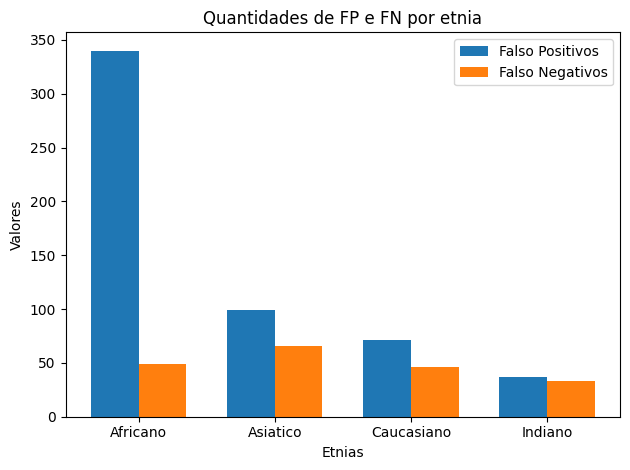

In [ ]:
categorias = ['Africano', 'Asiatico', 'Caucasiano', 'Indiano']
FalsoPositivos = [len(AfroFPidx), len(AsianFPidx), len(CaucasianFPidx), len(IndianFPidx)]
FalsoNegativos = [len(AfroFNidx), len(AsianFNidx), len(CaucasianFNidx), len(IndianFNidx)]
x = range(len(categorias))
bar_width = 0.35

fig, ax = plt.subplots()


rects = ax.bar(x, FalsoPositivos, bar_width, label='Falso Positivos')
rects2 = ax.bar([pos + bar_width for pos in x], FalsoNegativos, bar_width, label='Falso Negativos')

ax.set_xlabel('Etnias')
ax.set_ylabel('Valores')
ax.set_title('Quantidades de FP e FN por etnia')
ax.set_xticks([pos + bar_width/2 for pos in x])
ax.set_xticklabels(categorias)
ax.legend()

plt.tight_layout()
print("Afro\n",cm_afro)
print("\nAsian\n",cm_asian)
print("\nCaucasian\n",cm_caucasian)
print("\nIndian\n",cm_indian)
plt.show()

In [ ]:
def extract_face(filename, required_size = (224, 224)):
 # load image from file
 pixels = plt.imread(filename)
 # create the detector, using default weights
 detector = mtcnn.MTCNN()
 # detect faces in the image
 results = detector.detect_faces(pixels)
 # extract the bounding box from the first face
 x1, y1, width, height = results[0]['box']
 x2, y2 = x1 + width, y1 + height
 # extract the face
 face = pixels[y1:y2, x1:x2]
 # resize pixels to the model size
 image = Image.fromarray(face)
 image = image.resize(required_size)
 face_array = np.asarray(image)
 return face_array

9999


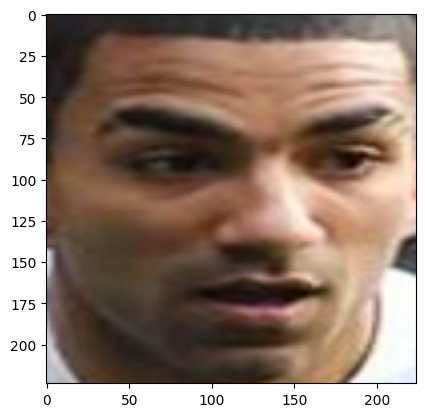

In [ ]:
detector = mtcnn.MTCNN()
face_array_train = np.zeros((10000,) + (224,224) + (3,), dtype=np.uint8)
for i in range(0, 10000):
    results = detector.detect_faces(X_train[i])
    clear_output(wait=True)
    print(i)
    if results:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = X_train[i][y1:y2, x1:x2]
        image = np.array(face)
        face_array_train[i] = cv2.resize(image,(224, 224))
        del results, x1, y1, x2, y2, width, height, face, image
    else:
        face_array_train[i] = X_train[i]
plt.imshow(face_array_train[0])
plt.show()

2499


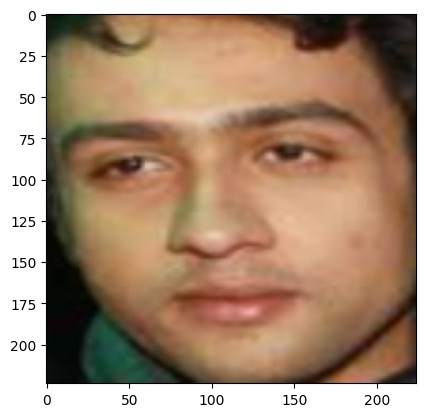

In [ ]:
face_array_test_afro = np.zeros((2500,) + (224,224) + (3,), dtype=np.uint8)
face_array_test_asian = np.zeros((2500,) + (224,224) + (3,), dtype=np.uint8)
face_array_test_caucasian = np.zeros((2500,) + (224,224) + (3,), dtype=np.uint8)
face_array_test_indian = np.zeros((2500,) + (224,224) + (3,), dtype=np.uint8)
for i in range(0, 2500):
    results = detector.detect_faces(X_test_afro[i])
    clear_output(wait=True)
    print(i)
    if results:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = X_test_afro[i][y1:y2, x1:x2]
        image = np.array(face)
        face_array_test_afro[i] = cv2.resize(image,(224, 224))
        del results, x1, y1, x2, y2, width, height, face, image
    else:
        face_array_test_afro[i] = X_test_afro[i]
plt.imshow(face_array_test_afro[0])
plt.show()

for i in range(0, 2500):
    results = detector.detect_faces(X_test_asian[i])
    clear_output(wait=True)
    print(i)
    if results:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = X_test_asian[i][y1:y2, x1:x2]
        image = np.array(face)
        face_array_test_asian[i] = cv2.resize(image,(224, 224))
        del results, x1, y1, x2, y2, width, height, face, image
    else:
        face_array_test_asian[i] = X_test_asian[i]
plt.imshow(face_array_test_asian[0])
plt.show()

for i in range(0, 2500):
    results = detector.detect_faces(X_test_caucasian[i])
    clear_output(wait=True)
    print(i)
    if results:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = X_test_caucasian[i][y1:y2, x1:x2]
        image = np.array(face)
        face_array_test_caucasian[i] = cv2.resize(image,(224, 224))
        del results, x1, y1, x2, y2, width, height, face, image
    else:
        face_array_test_caucasian[i] = X_test_caucasian[i]
plt.imshow(face_array_test_caucasian[0])
plt.show()

for i in range(0, 2500):
    results = detector.detect_faces(X_test_indian[i])
    clear_output(wait=True)
    print(i)
    if results:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        face = X_test_indian[i][y1:y2, x1:x2]
        image = np.array(face)
        face_array_test_indian[i] = cv2.resize(image,(224, 224))
        del results, x1, y1, x2, y2, width, height, face, image
    else:
        face_array_test_indian[i] = X_test_indian[i]
plt.imshow(face_array_test_indian[0])
plt.show()

In [ ]:
features_train = model.predict(face_array_train)
svm = SVC()
svm.fit(features_train, y_train)
print("Done Training")
#del features_train

features_test_afro_cropped = model.predict(face_array_test_afro)
print("Done Building features_test_afro_cropped")
accuracy_afro_cropped = svm.score(features_test_afro, y_test_afro)
print("Done testing")

features_test_asian_cropped = model.predict(face_array_test_asian)
print("Done Building features_test_asian_cropped")
accuracy_asian_cropped = svm.score(features_test_asian, y_test_asian)
print("Done testing")

features_test_caucasian_cropped = model.predict(face_array_test_caucasian)
print("Done Building features_test_caucasian_cropped")
accuracy_caucasian_cropped = svm.score(features_test_caucasian, y_test_caucasian)
print("Done testing")

features_test_indian_cropped = model.predict(face_array_test_indian)
print("Done Building features_test_indian_cropped")
accuracy_indian_cropped = svm.score(features_test_indian, y_test_indian)
print("Done testing")

313/313 [==============================] - 13s 43ms/step


c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Done Training
79/79 [==============================] - 3s 42ms/step
Done Building features_test_afro_cropped
Done testing
79/79 [==============================] - 3s 41ms/step
Done Building features_test_asian_cropped
Done testing
79/79 [==============================] - 3s 41ms/step
Done Building features_test_caucasian_cropped
Done testing
79/79 [==============================] - 3s 41ms/step
Done Building features_test_indian_cropped
Done testing


In [ ]:
print("Cropped afro accuracy: ", accuracy_afro_cropped)
print("Non cropped afro accuracy: ", accuracy_afro)
print("\nCropped asian accuracy: ", accuracy_asian_cropped)
print("Non cropped asian accuracy: ", accuracy_asian)
print("\nCropped caucasian accuracy: ", accuracy_caucasian_cropped)
print("Non cropped caucasian accuracy: ", accuracy_caucasian)
print("\nCropped indian accuracy: ", accuracy_indian_cropped)
print("Non cropped indian accuracy: ", accuracy_indian)




Cropped afro accuracy:  0.7916
Non cropped afro accuracy:  0.8444

Cropped asian accuracy:  0.8952
Non cropped asian accuracy:  0.934

Cropped caucasian accuracy:  0.9168
Non cropped caucasian accuracy:  0.9532

Cropped indian accuracy:  0.9436
Non cropped indian accuracy:  0.972


In [ ]:
predicted_labels_afro_cropped = svm.predict(features_test_afro_cropped)
cm_afro_cropped = confusion_matrix(y_test_afro, predicted_labels_afro_cropped)

AfroFPidxCropped = []
AfroFNidxCropped = []
Separator(predicted_labels_afro_cropped, y_test_afro, AfroFNidxCropped, AfroFPidxCropped)

predicted_labels_asian_cropped = svm.predict(features_test_asian_cropped)
cm_asian_cropped = confusion_matrix(y_test_asian, predicted_labels_asian_cropped)

AsianFPidxCropped = []
AsianFNidxCropped = []
Separator(predicted_labels_asian_cropped, y_test_asian, AsianFNidxCropped, AsianFPidxCropped)

predicted_labels_caucasian_cropped = svm.predict(features_test_caucasian_cropped)
cm_caucasian_cropped = confusion_matrix(y_test_caucasian, predicted_labels_caucasian_cropped)

CaucasianFPidxCropped = []
CaucasianFNidxCropped = []
Separator(predicted_labels_caucasian_cropped, y_test_caucasian, CaucasianFNidxCropped, CaucasianFPidxCropped)

predicted_labels_indian_cropped = svm.predict(features_test_indian_cropped)
cm_indian_cropped = confusion_matrix(y_test_indian, predicted_labels_indian_cropped)

IndianFPidxCropped = []
IndianFNidxCropped = []
Separator(predicted_labels_indian_cropped, y_test_indian, IndianFNidxCropped, IndianFPidxCropped)

In [ ]:
def FPFNGenerator(PathToFolder, idx, imgs):
    if not os.path.exists(PathToFolder):
        os.makedirs(PathToFolder)
    else:
        shutil.rmtree(PathToFolder)
        os.makedirs(PathToFolder)
    for i in idx:
        image = Image.fromarray(imgs[i])
        image_filename = os.path.join(PathToFolder, f"{i}.png")
        image.save(image_filename)

FPFNGenerator("./FACES/VMERBalancedCropped/AfroFP",AfroFPidxCropped, face_array_test_afro)
FPFNGenerator("./FACES/VMERBalancedCropped/AfroFN",AfroFNidxCropped, face_array_test_afro)

FPFNGenerator("./FACES/VMERBalancedCropped/AsianFP",AsianFPidxCropped, face_array_test_asian)
FPFNGenerator("./FACES/VMERBalancedCropped/AsianFN",AsianFNidxCropped, face_array_test_asian)

FPFNGenerator("./FACES/VMERBalancedCropped/CaucasianFP",CaucasianFPidxCropped, face_array_test_caucasian)
FPFNGenerator("./FACES/VMERBalancedCropped/CaucasianFN",CaucasianFNidxCropped, face_array_test_caucasian)

FPFNGenerator("./FACES/VMERBalancedCropped/IndianFP",IndianFPidxCropped, face_array_test_indian)
FPFNGenerator("./FACES/VMERBalancedCropped/IndianFN",IndianFNidxCropped, face_array_test_indian)

Afro
 [[ 969  281]
 [  58 1192]]

Asian
 [[1194   56]
 [  52 1198]]

Caucasian
 [[1232   18]
 [  29 1221]]

Indian
 [[1239   11]
 [   5 1245]]


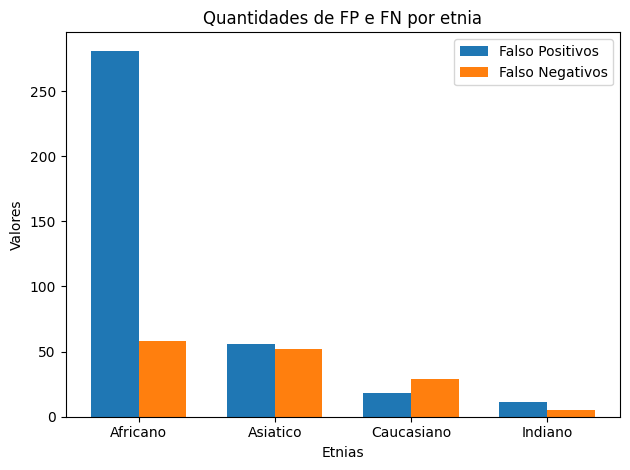

In [ ]:
categorias = ['Africano', 'Asiatico', 'Caucasiano', 'Indiano']
FalsoPositivos = [len(AfroFPidxCropped), len(AsianFPidxCropped), len(CaucasianFPidxCropped), len(IndianFPidxCropped)]
FalsoNegativos = [len(AfroFNidxCropped), len(AsianFNidxCropped), len(CaucasianFNidxCropped), len(IndianFNidxCropped)]
x = range(len(categorias))
bar_width = 0.35

fig, ax = plt.subplots()


rects = ax.bar(x, FalsoPositivos, bar_width, label='Falso Positivos')
rects2 = ax.bar([pos + bar_width for pos in x], FalsoNegativos, bar_width, label='Falso Negativos')

ax.set_xlabel('Etnias')
ax.set_ylabel('Valores')
ax.set_title('Quantidades de FP e FN por etnia')
ax.set_xticks([pos + bar_width/2 for pos in x])
ax.set_xticklabels(categorias)
ax.legend()

plt.tight_layout()
print("Afro\n",cm_afro_cropped)
print("\nAsian\n",cm_asian_cropped)
print("\nCaucasian\n",cm_caucasian_cropped)
print("\nIndian\n",cm_indian_cropped)
plt.show()

In [ ]:
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis import utils
layer_idx = utils.find_layer_idx(model, 'predictions')
gradcam = Gradcam(model, clone = False)
cam = gradcam(model, clone = False, penultimate_layer = -1)
input_img = preprocess_input(face_array_test_afro)


ModuleNotFoundError: No module named 'tensorflow.python.trackable'